In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Blood_samples_dataset_balanced_2(f).csv")

In [ ]:
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [ ]:
df.isnull().sum()

,0
Glucose,0
Cholesterol,0
Hemoglobin,0
Platelets,0
White Blood Cells,0
Red Blood Cells,0
Hematocrit,0
Mean Corpuscular Volume,0
Mean Corpuscular Hemoglobin,0
Mean Corpuscular Hemoglobin Concentration,0


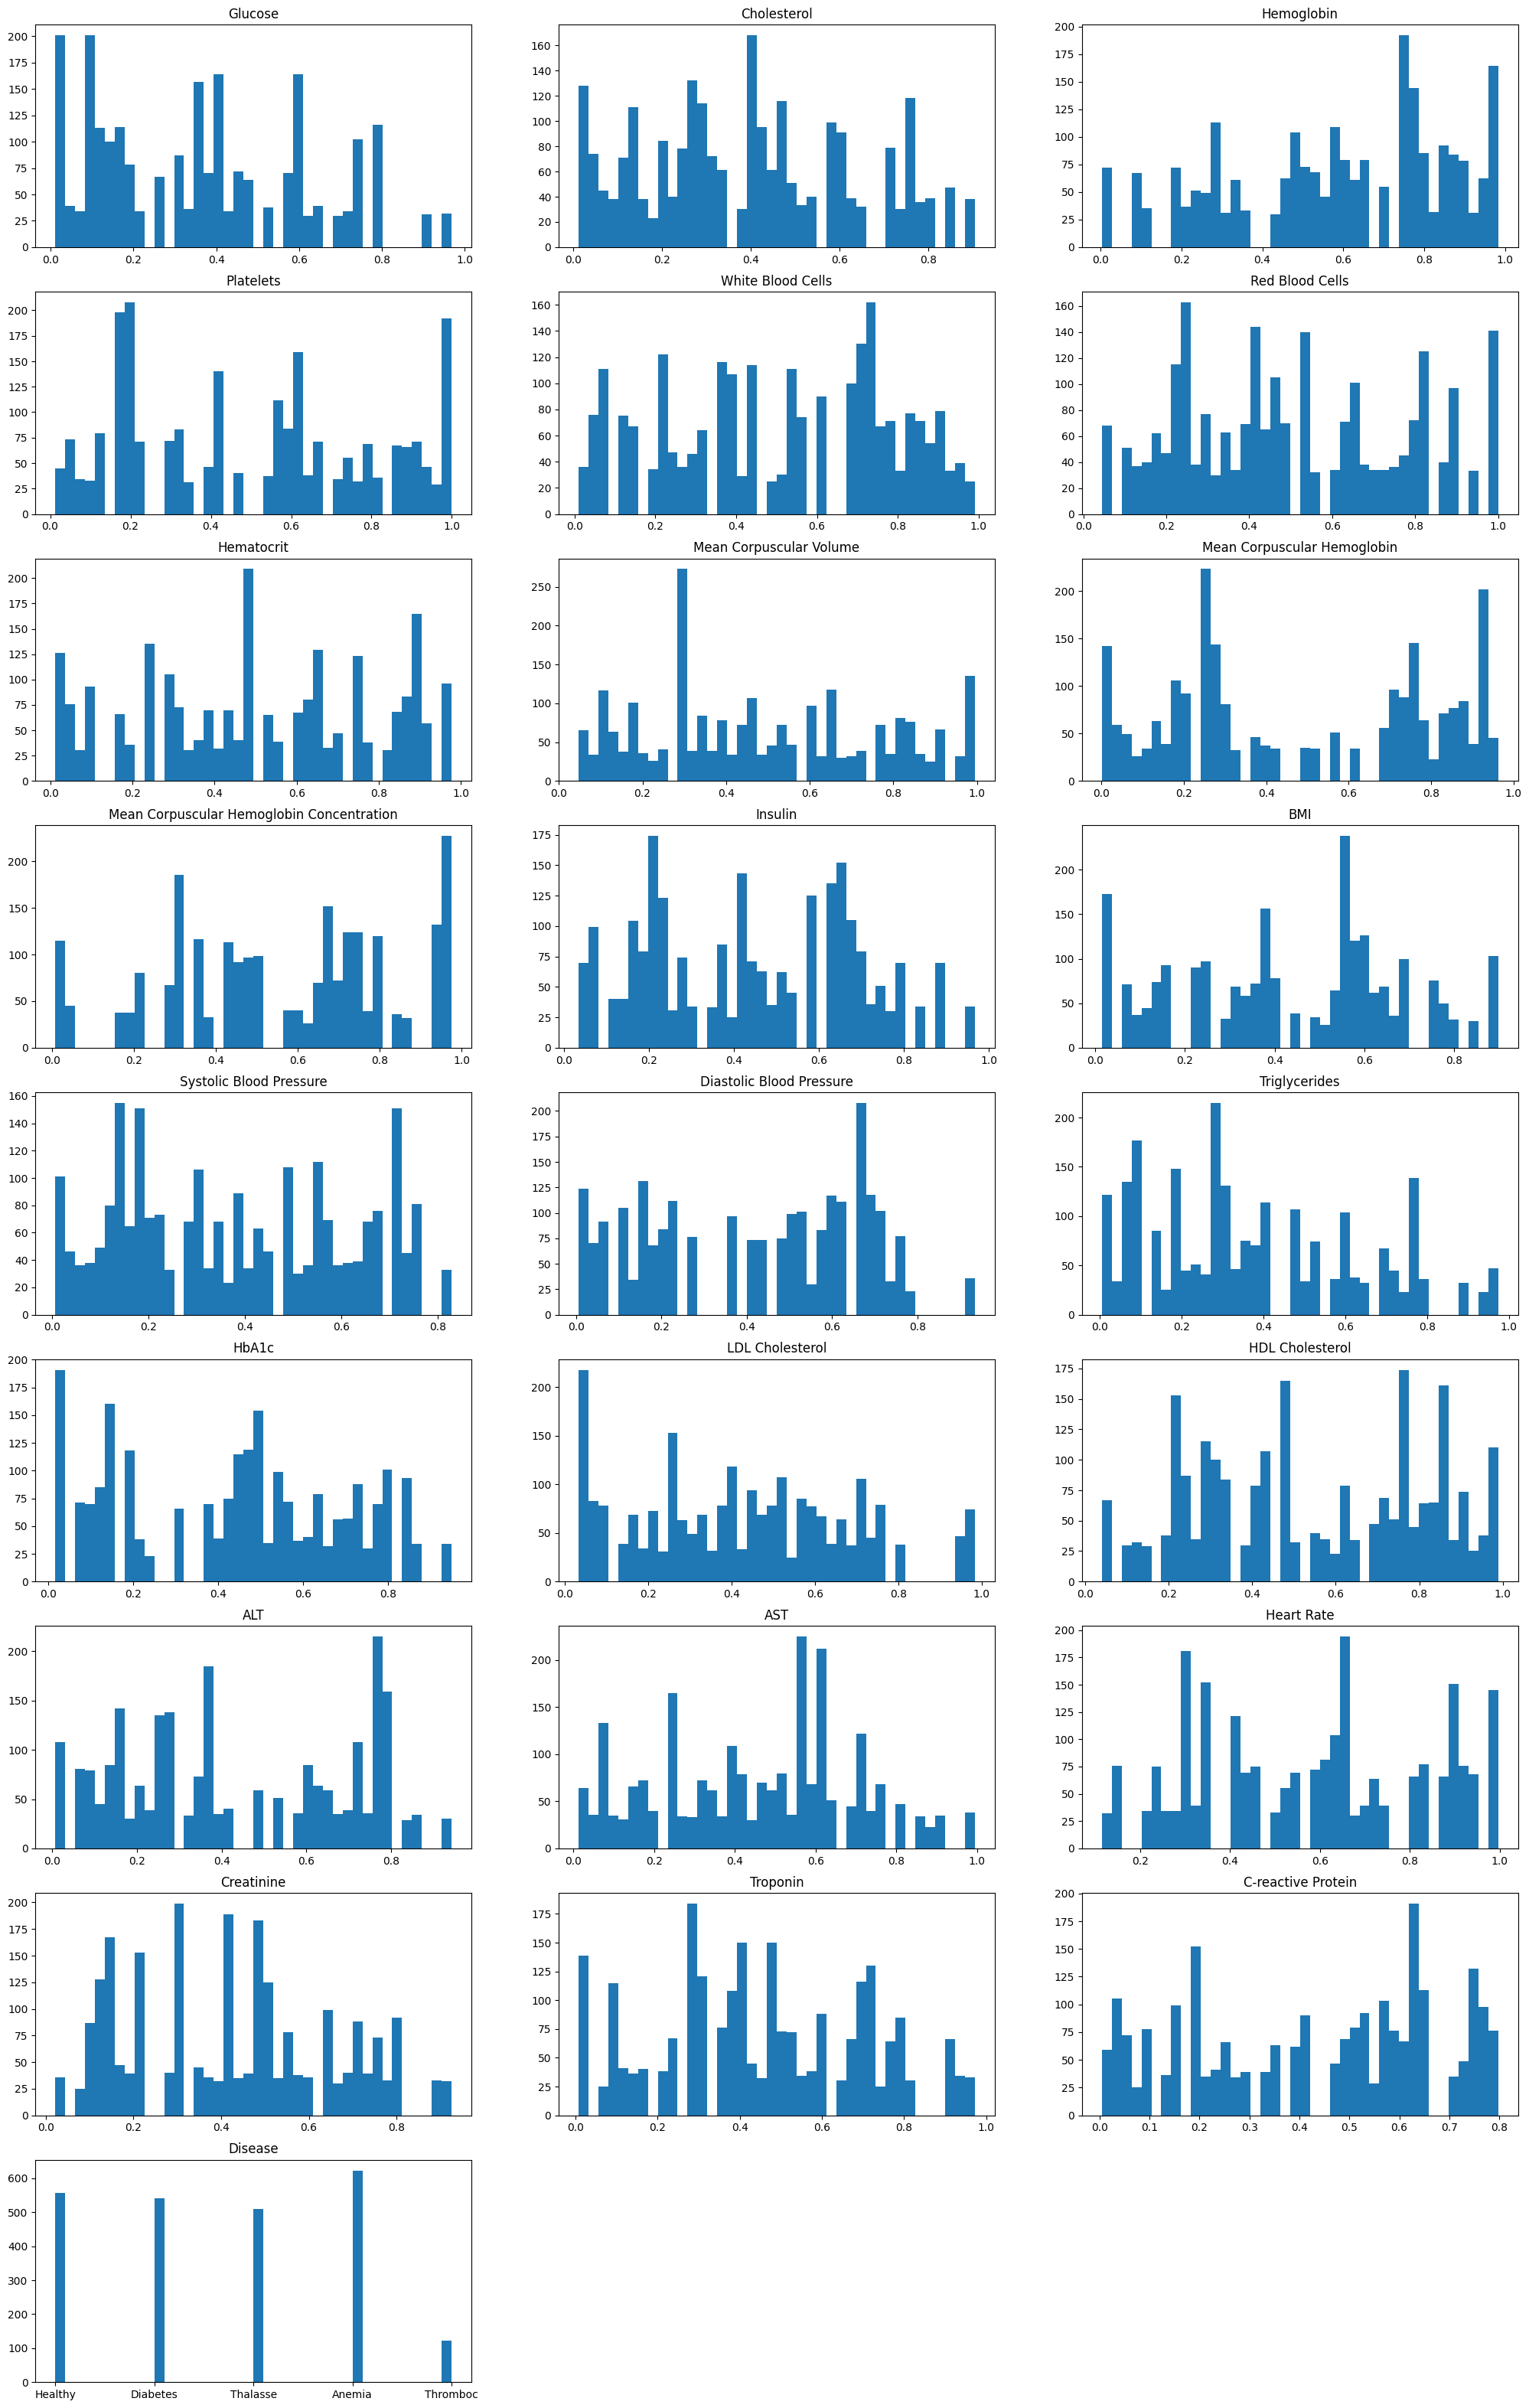

In [ ]:
plt.figure(figsize=(25,40))
for i,col in enumerate(df.columns):
  plt.subplot(9,3,i+1)
  plt.hist(df[col],bins=40)
  plt.title(col)
plt.show()

## Handling missing values using mean for numerical values and mode for categorical values.

In [ ]:
categorical = []
numerical = []

for column in df.columns:
  if column in ['int64','float64']:
    categorical.append(column)
    df[column].fillna(df[column].mean(),inplace=True)
  else:
    numerical.append(column)
    df[column].fillna(df[column].mode()[0],inplace=True)

/tmp/ipython-input-1275515798.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0],inplace=True)


In [ ]:
num_columns = df.select_dtypes(include=np.number).columns

for col in num_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)]


In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
"""scaler = StandardScaler()
le = LabelEncoder()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_train_labeled = le.fit_transform(y_train)"""

In [ ]:
Disease = le.classes_
Disease


array(['Anemia', 'Diabetes', 'Healthy', 'Thalasse', 'Thromboc'],
      dtype=object)

In [ ]:
X_train_scaled

array([[ 0.16511321, -1.14298735,  1.46890755, ..., -0.49934705,
        -0.56875788,  0.79485592],
       [-0.66741944, -0.97179168,  1.03883592, ...,  0.30398314,
        -1.76281459,  0.83874747],
       [ 1.41339731, -0.40443932, -0.36121477, ..., -0.92841554,
         0.38700359, -1.61066098],
       ...,
       [-0.87733112, -1.29081686, -2.06295534, ..., -0.51873208,
         0.45245674,  1.33620347],
       [ 1.71560622,  0.01515712, -0.39485708, ...,  1.42727022,
         1.92177642,  0.93078265],
       [ 1.41339731, -0.40443932, -0.36121477, ..., -0.92841554,
         0.38700359, -1.61066098]])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
svm_clf_pipe = make_pipeline(StandardScaler(),LinearSVC(random_state=42,C=5))

In [ ]:
svm_clf_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=5, random_state=42))])

In [ ]:
y_predict = svm_clf_pipe.predict(X_test)

In [ ]:
svm_clf_pipe.decision_function(X_test)

array([[  0.99758266, -12.71993926,  -5.84604702,  -4.01234212,
         -2.28437481],
       [ -1.87384557,  -8.47977186,   5.04019395, -16.93452659,
         -2.76398612],
       [ -2.22952706,   0.99728489,  -2.04191884, -15.26276027,
         -3.43873821],
       ...,
       [ -4.53276806,  -4.16540193,  -0.99727664, -14.22829157,
          0.99858362],
       [  0.99803669, -23.17908834,  -0.99645554,  -0.95262848,
         -4.41603504],
       [  1.42497943,  -6.74792384,  -0.99754115, -37.93236932,
         -2.03868602]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support

In [ ]:
accuracy_score(y_test,y_predict)

1.0

In [ ]:
confusion_matrix(y_test,y_predict)

array([[134,   0,   0,   0,   0],
       [  0, 112,   0,   0,   0],
       [  0,   0, 102,   0,   0],
       [  0,   0,   0, 103,   0],
       [  0,   0,   0,   0,  20]])

In [ ]:
precision_recall_fscore_support(y_test,y_predict)

(array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([134, 112, 102, 103,  20]))

In [ ]:
user_input = []
svm_clf_pipe.predict()

In [ ]:
arr = X_test.iloc[0:5,:]

In [ ]:
arr

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
2236,0.024837,0.418761,0.626973,0.856957,0.763687,0.523927,0.059236,0.865591,0.289135,0.007903,0.491628,0.329289,0.345707,0.276135,0.292204,0.531881,0.044196,0.825226,0.404381,0.619854,0.646951,0.308306,0.767154,0.212200
668,0.348493,0.312579,0.284949,0.412179,0.916696,0.258357,0.758897,0.179695,0.257735,0.709610,0.135627,0.554111,0.188181,0.024311,0.761350,0.461701,0.577602,0.538216,0.090484,0.189425,0.454870,0.515557,0.490241,0.770657
2005,0.440142,0.718821,0.289345,0.884298,0.428488,0.364889,0.849902,0.911853,0.043986,0.962334,0.624519,0.250097,0.284485,0.175469,0.094568,0.853456,0.194263,0.311117,0.341065,0.849379,0.262753,0.214560,0.905628,0.489070
808,0.143772,0.089600,0.027259,0.171121,0.744950,0.452787,0.871778,0.995263,0.872038,0.311175,0.655545,0.358225,0.392288,0.111589,0.012693,0.133001,0.261072,0.200323,0.363050,0.558191,0.304237,0.306539,0.566289,0.754189
2053,0.254839,0.125606,0.964963,0.580719,0.815725,0.458429,0.893228,0.429131,0.195760,0.694565,0.522603,0.285962,0.233920,0.625938,0.282993,0.025010,0.422977,0.759931,0.651537,0.076343,0.510846,0.558042,0.228078,0.358865


In [ ]:
predict = svm_clf_pipe.predict(X_test.iloc[:5,:])

In [ ]:
predict

array(['Anemia', 'Healthy', 'Diabetes', 'Thalasse', 'Healthy'],
      dtype=object)

In [ ]:
y_test.iloc[0:5]

,Disease
2236,Anemia
668,Healthy
2005,Diabetes
808,Thalasse
2053,Healthy


In [ ]:
for i,col in enumerate(df.columns):
  print(i,col)

0 Glucose
1 Cholesterol
2 Hemoglobin
3 Platelets
4 White Blood Cells
5 Red Blood Cells
6 Hematocrit
7 Mean Corpuscular Volume
8 Mean Corpuscular Hemoglobin
9 Mean Corpuscular Hemoglobin Concentration
10 Insulin
11 BMI
12 Systolic Blood Pressure
13 Diastolic Blood Pressure
14 Triglycerides
15 HbA1c
16 LDL Cholesterol
17 HDL Cholesterol
18 ALT
19 AST
20 Heart Rate
21 Creatinine
22 Troponin
23 C-reactive Protein
24 Disease
